# Relationship Between Marijuana/Cannabis Ese and Household Income 

   Studies have found a relationship between substance abuse and socioeconomic background, showing that substance abuse in young adults/children is associated with "income, wealth and parental education" (Patrick, M. E., Wightman, 2012). Manhica et al.’s study also concluded that early childhood poverty increased the risk of substance abuse in the future. To help us understand these associations, we chose the data set from the Canadian student tobacco alcohol and drugs survey administered to students from grades 7 to 12. We want to find out if there exists a relationship between marijuana/cannabis use and household income.

*Dataset:* Health Canada; PROPEL Centre for Population Health Impact, 2020, "2018/2019 Canadian student tobacco, alcohol and drugs survey", https://hdl.handle.net/11272.1/AB2/WEFOHY, Abacus Data Network, V1, UNF:6:b30sgE/74ieEDNG49VXOJQ== [fileUNF]

Methods: 
We will use the following two variables from the data set and use classification, rather than regression 

**CAN_040** : In the last 30 days, how often did you use marijuana or cannabis? Options include
   
* I have not done this in the last 30 days
* Once or twice
* Once or twice a week
* 3 or 4 times a week
* 5 or 6 times a week
* every day
* I do not know
* valid skip
* not stated

**DVHHINC2** : Median Household Income of the area where the respondent’s school is located according to the Canadian 2016 census data.

To display the relationship between income and number of people using marijuana, we will plot a bar plot with income on the x-axis and number of drug users on the y-axis. We expect to find that if household income is higher, then marijuana/cannabis use would be lower, so a negative relationship between these two variables. If our findings show that a particular income group is associated with drug use, organizations would be able to address particular income areas in an attempt to lower substance abuse.

If our hypothesis is correct, we could address further questions such as :

- Would individuals who come from a lower income household have better access to other types of drugs? 
- Why would higher income individuals have lower drug use?
- What other reasoning would be behind higher drug use among individuals who come from lower income households? Is bullying a factor?


In [15]:
library(repr)
library(tidyverse)
library(tidymodels)

In [16]:
drugdata <- read_tsv("cstdata.tab")

Rows: 46020 Columns: 185
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (185): SCANID, MODULE, PROVID, SCHID, GRADE, SEX, SS_010, SS_020, TS_011...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [17]:
head(drugdata)

SCANID,MODULE,PROVID,SCHID,GRADE,SEX,SS_010,SS_020,TS_011,TV_010,⋯,DVTY2ST,DVLAST30,DVAMTSMK,DVCIGWK,DVNDSMK,DVAVCIGD,DVRES,DVURBAN,DVHHINC2,WTPP
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100224,1,35,3589267,9,1,1,13,2,3,⋯,1,1,1,8,5,2,1,2,60000,33.15
100225,1,35,3589267,9,1,1,13,1,1,⋯,1,1,10,70,7,10,1,2,60000,33.15
100226,1,35,3589267,12,1,2,96,4,3,⋯,7,2,96,996,96,96,3,2,60000,75.14
100227,1,35,3589267,12,2,1,2,3,2,⋯,4,1,0,0,0,0,1,2,60000,105.70
100228,1,35,3589267,12,1,1,2,3,3,⋯,6,2,96,996,96,96,1,2,60000,75.14
100229,1,35,3589267,11,1,2,96,4,3,⋯,7,2,96,996,96,96,1,2,60000,63.87


First, select only the data that we need. In our case, select the variable CAN_040, which tells us how often an individual has used marijuana/cannabis in the last 30 days; and select DVHHINC2 for average household income of the individual's general school area.

Re-naming the column names so they are more readable.

Showing only first 6 rows of selected data 

In [18]:
selected_drugdata <- select(drugdata, DVHHINC2 , CAN_040)
colnames(selected_drugdata) <- c("household_income","cannabis_use")

head(selected_drugdata)

household_income,cannabis_use
<dbl>,<dbl>
60000,96
60000,6
60000,2
60000,2
60000,2
60000,96


In [19]:
filtered_drugdata <- selected_drugdata |>
    filter(cannabis_use == 2 | cannabis_use == 3 | cannabis_use == 4 | cannabis_use == 5| cannabis_use == 6)

head(filtered_drugdata)
    

household_income,cannabis_use
<dbl>,<dbl>
60000,6
60000,2
60000,2
60000,2
60000,5
60000,2


We filter the results that correspond to those who answered "yes" to have used cannabis at least once in the last 30 days.

In [20]:
number_respondents <- selected_drugdata |>
    group_by(household_income) |>
    summarize(count=n())

number_respondents

household_income,count
<dbl>,<int>
40000,240
45000,3570
50000,3401
55000,3722
60000,6554
65000,4006
70000,4601
75000,3951
80000,4456


Shows total number of respondents to the specified question in the survey.

In [21]:
set.seed(1)
drugdata_split <- initial_split(filtered_drugdata, prop = 0.75, strata = household_income)  
drugdata_train <- training(drugdata_split)
drugdata_test <- testing(drugdata_split)

head(drugdata_train)
head(drugdata_test)


household_income,cannabis_use
<dbl>,<dbl>
50000,2
50000,5
45000,2
45000,6
45000,2
45000,2


household_income,cannabis_use
<dbl>,<dbl>
60000,6
60000,2
60000,2
60000,6
60000,6
60000,5


Dataset is split into training(75%) data and test(25%) data

In [22]:
drugdata_count <- drugdata_train |>
    group_by(household_income) |>
    summarize(count=n())


The cell above shows the number of people who have used cannabis/marijuana in the last 30 days, grouped by different levels of income.

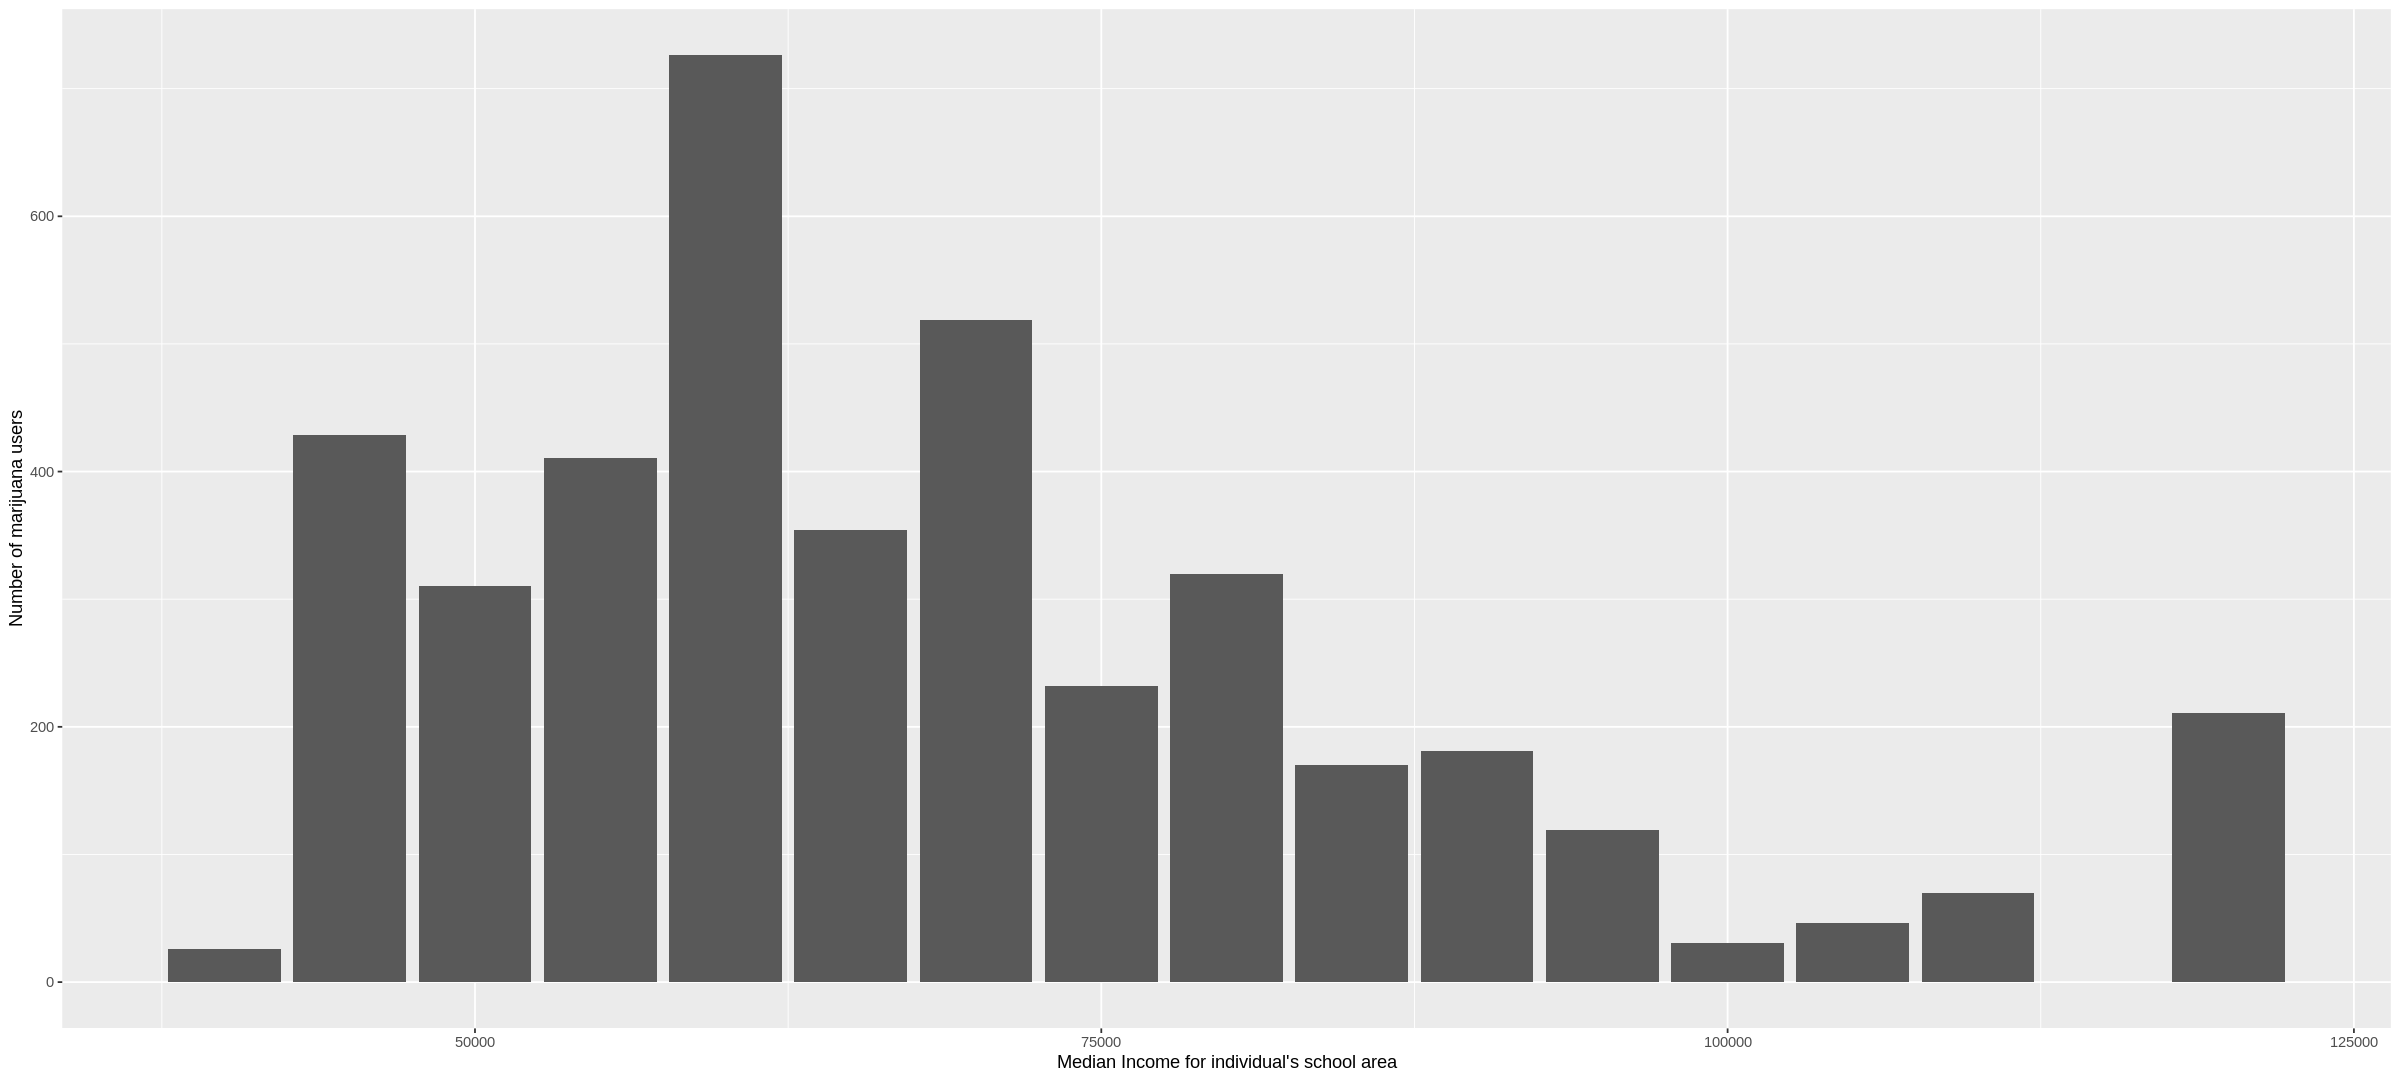

In [23]:
options(repr.plot.width = 20, repr.plot.height = 9)
drugdata_plot <- drugdata_count |>
    ggplot(aes(x = household_income, y = count))+
    geom_bar(stat="identity") +
    xlab("Median Income for individual's school area") + ylab("Number of marijuana users")

drugdata_plot

**References**

Manhica, H., Straatmann, V. S., Lundin, A., Agardh, E., & Danielsson, A. (2021). Association between poverty exposure during childhood and adolescence, and drug use disorders and drug‐related crimes later in life. Addiction (Abingdon, England), 116(7), 1747-1756. 

Patrick, M. E., Wightman, P., Schoeni, R. F., &amp; Schulenberg, J. E. (2012, September). Socioeconomic status and substance use among young adults: A comparison across constructs and Drugs. Journal of studies on alcohol and drugs. 